In this notebook we do some more advanced analysis using data from a 4 GB database

In [1]:
!pip show HASS-data-detective|grep Version

Version: 1.0


In [42]:
import detective.core as detective
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'

In [3]:
db_path = 'Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db'

In [4]:
%%time
db = detective.HassDatabase('sqlite:////' + db_path) 

Successfully connected to database sqlite:////Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db
There are 17 entities with data
CPU times: user 481 ms, sys: 2.54 s, total: 3.02 s
Wall time: 13.6 s


In [5]:
db.domains

['device_tracker',
 'binary_sensor',
 'input_select',
 'persistent_notification',
 'sensor',
 'sun',
 'updater',
 'zone',
 'remote',
 'automation',
 'switch',
 'alarm_control_panel',
 'camera',
 'light',
 'script',
 'group',
 'media_player']

In [6]:
db.entities['binary_sensor']

['binary_sensor.bayesianbinary',
 'binary_sensor.bedroom_motion_sensor',
 'binary_sensor.blink_armed_status',
 'binary_sensor.blink_blink_camera_percy_motion_enabled',
 'binary_sensor.hall_motion_sensor',
 'binary_sensor.in_bed_bayesian',
 'binary_sensor.living_room_motion_sensor',
 'binary_sensor.living_room_nest_protect_online',
 'binary_sensor.motion_at_home',
 'binary_sensor.workday_sensor']

## Query all data
Data-detective takes care of parsing data from the database, intelligently sorting out numerical and categorical data and formatting them correctly. Use fetch_all_data to import all your db data into a pandas dataframe in memory -> this approach means it can take a while to load the data into memory, but subsequent processing and handling are much faster/easier.

In [7]:
%%time
db.fetch_all_data(limit=1e9) # Pass in a high limit to return all data

Querying the database, this could take a while
master_df created successfully.
CPU times: user 17.1 s, sys: 19 s, total: 36.1 s
Wall time: 1min 32s


The unprocessed dataframe is in the `master_df` attribute

In [11]:
f"There are {db.master_df.shape[0]/1e6} million rows of data in the database"

'There are 2.164542 million rows of data in the database'

## Numerical sensor data
We now do additional processing to put numerical sensor data into its own dataframe

In [15]:
sensors_num = detective.NumericalSensors(db.master_df)

In [23]:
f"There are {sensors_num.data.shape[0]/1e6} million rows of data in the sensors_num dataframe"

'There are 0.263066 million rows of data in the sensors_num dataframe'

In [18]:
sensors_num.data.head()

entity,sensor.average_indoor_temp,sensor.bedroom_light_sensor,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.breaches_fredallcardgmailcom,...,sensor.next_train_to_wat,sensor.next_train_to_wim,sensor.remote_living_room_button,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.volume_used_volume_1,sensor.wipy_humidity,sensor.wipy_memory,sensor.wipy_temperature,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2017-10-28 06:48:00.143377,20.2,15621.0,18.89,1.0,21.0,98.51,43.58,1033.93,21.07,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.060922,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.93,21.07,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.069416,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.93,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.076784,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.95,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.079950,20.2,15621.0,18.89,1.0,21.0,98.54,43.50,1033.95,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0


Lets plot a few entities

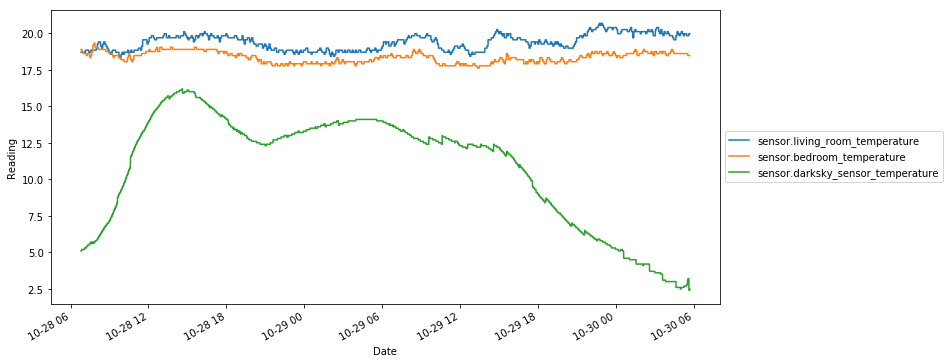

In [21]:
to_plot = ['sensor.living_room_temperature',
           'sensor.bedroom_temperature',
           'sensor.darksky_sensor_temperature']

sensors_num.plot(to_plot)

We can export the dataframe to a csv

In [44]:
sensors_num.data.to_csv('data/sensors_num.csv')

In [48]:
f"Exporting all the numerical data to csv created a file of size {os.stat('data/sensors_num.csv').st_size/1e6} MB"

'Exporting all the numerical data to csv created a file of size 85.614508 MB'

We can push files [up to 100MB](https://help.github.com/articles/what-is-my-disk-quota/) to Github

## Binary data
The BinarySensors class is for binary sensor data with on/off states.

In [22]:
sensors_binary = detective.BinarySensors(db.master_df)

In [25]:
f"There are {sensors_binary.data.shape[0]/1e3} thousand rows of data in the sensors_binary dataframe"

'There are 75.561 thousand rows of data in the sensors_binary dataframe'

In [26]:
sensors_binary.entities

['binary_sensor.motion_at_home',
 'binary_sensor.workday_sensor',
 'binary_sensor.blink_blink_camera_percy_motion_enabled',
 'binary_sensor.blink_armed_status',
 'binary_sensor.living_room_nest_protect_online',
 'binary_sensor.in_bed_bayesian',
 'binary_sensor.bayesianbinary',
 'binary_sensor.living_room_motion_sensor',
 'binary_sensor.bedroom_motion_sensor',
 'binary_sensor.hall_motion_sensor']

Currently we can plot a single binary sensor with the plot() method

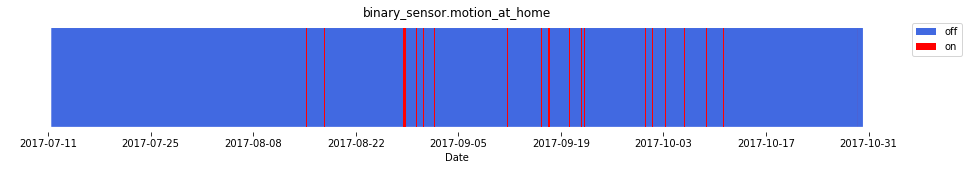

In [27]:
sensors_binary.plot('binary_sensor.motion_at_home')

Lets create a csv for the binary dataframe also

In [49]:
sensors_binary.data.to_csv('data/sensors_binary.csv')

## Day of week analysis
Lets analyse the `motion_at_home,` create some features for day of week and time category, then analyse motion by these features.

In [29]:
motion_df = sensors_binary.data[['binary_sensor.motion_at_home']] # Must pass a list to return correctly indexed df

In [32]:
motion_df.head()

entity,binary_sensor.motion_at_home
last_changed,
2017-07-11 10:28:17.460144,NaN
2017-07-11 10:28:18.898022,NaN
2017-07-11 10:28:18.951186,NaN
2017-07-11 10:28:19.047789,NaN
2017-07-11 12:00:03.023620,NaN


We create our first feature `weekday` from the index

In [33]:
motion_df['weekday'] = motion_df.index.weekday_name

In [34]:
motion_df.head()

entity,binary_sensor.motion_at_home,weekday
last_changed,,
2017-07-11 10:28:17.460144,NaN,Tuesday
2017-07-11 10:28:18.898022,NaN,Tuesday
2017-07-11 10:28:18.951186,NaN,Tuesday
2017-07-11 10:28:19.047789,NaN,Tuesday
2017-07-11 12:00:03.023620,NaN,Tuesday


Detective has a couple of helpers to create additional features

In [35]:
from detective.time import is_weekday, time_category

In [36]:
motion_df['is_weekday'] = motion_df.index.map(lambda x: is_weekday(x))

In [37]:
motion_df['time_category'] = motion_df.index.map(lambda x: time_category(x))

Lets keep only true detection events

In [38]:
motion_df = motion_df[motion_df['binary_sensor.motion_at_home'] == True]

We can now see the new features in the dataframe

In [39]:
motion_df.head()

entity,binary_sensor.motion_at_home,weekday,is_weekday,time_category
last_changed,,,,
2017-08-07 20:08:17.810800,True,Monday,True,evening
2017-08-07 20:08:26.921077,True,Monday,True,evening
2017-08-07 20:10:20.017217,True,Monday,True,evening
2017-08-07 20:11:31.024414,True,Monday,True,evening
2017-08-07 20:12:02.027471,True,Monday,True,evening


We can now use a `groupby` operation to get the number of motion counts per day

In [40]:
motion_df_gb = motion_df['binary_sensor.motion_at_home'].groupby([motion_df['weekday'], motion_df['time_category']]).sum().unstack()
motion_df_gb.fillna(value=0, inplace=True)   # Replace NaN with 0
motion_df_gb = motion_df_gb.astype('int')              # Ints rather than floats
motion_df_gb = motion_df_gb.T
motion_df_gb

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time_category,,,,,,,
daytime,1000,690,962,631,844,880,800
evening,394,599,239,496,453,532,545
morning,839,688,1047,833,664,655,619
night,92,93,131,113,163,149,163


Finally we can use seaborn to visualise this data

Text(0.5,1,'Activity at home by day and time category')

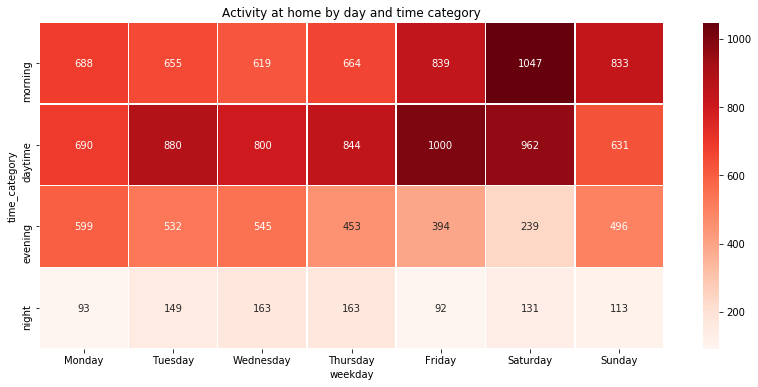

In [43]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14, 6))
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_list = ['morning', 'daytime', 'evening', 'night']
ax = sns.heatmap(motion_df_gb[days_list].loc[times_list], annot=True, linewidths=.5, fmt="d", ax=ax, cmap='Reds');
ax.set_title('Activity at home by day and time category')

We see that Saturday morning there was a lot of activity at home, which is usually when I do weekly chores such as hoovering